# Esercitazione di Laboratorio n. 4

#### Autore: Davide Cernuzio

### Parte II: Algoritmo di Runge-Kutta

Risolvere l'equazione differenziale

$\displaystyle \large \begin{cases} \displaystyle \frac{dy}{dx} = f(x,y) = -xy \\ \\ y(0) = 1 \end{cases}$

con il metodo di Runge-Kutta. Graficare la soluzione numerica e confrontarla con quella analitica

$\large y(x) = c \ e^{-x^2 / 2} \;\;\;$ ove $\large \;\;\; c = y_0 \; e^{x_0^2/2}$

nel dominio $[0,1]$. Valutare l'errore globale.

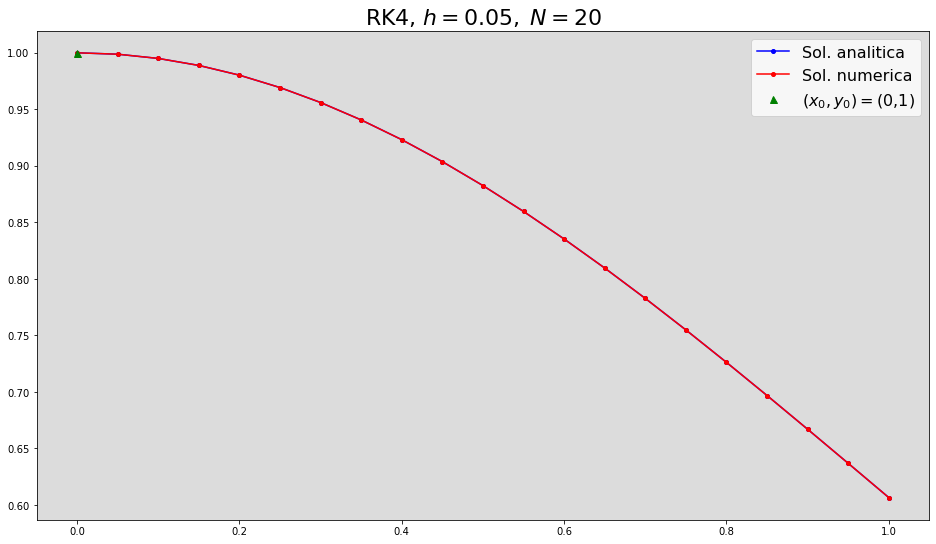

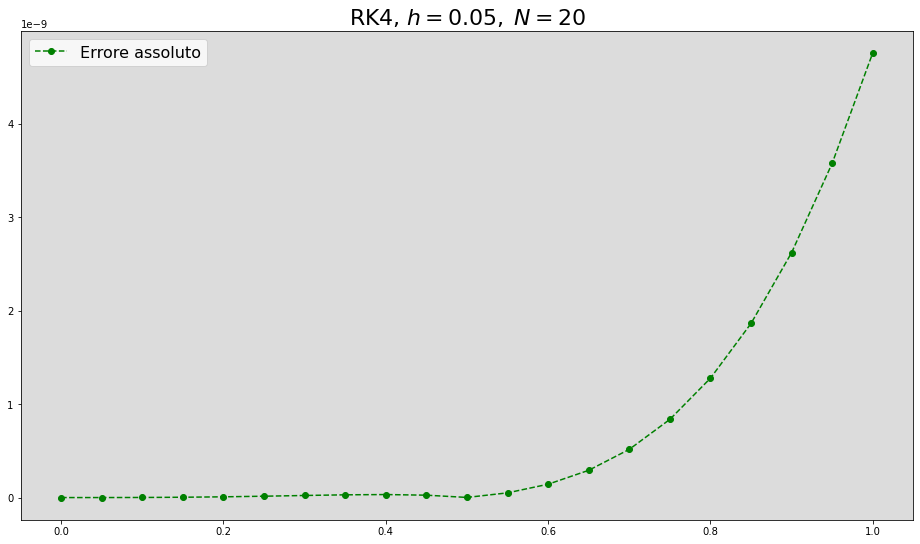

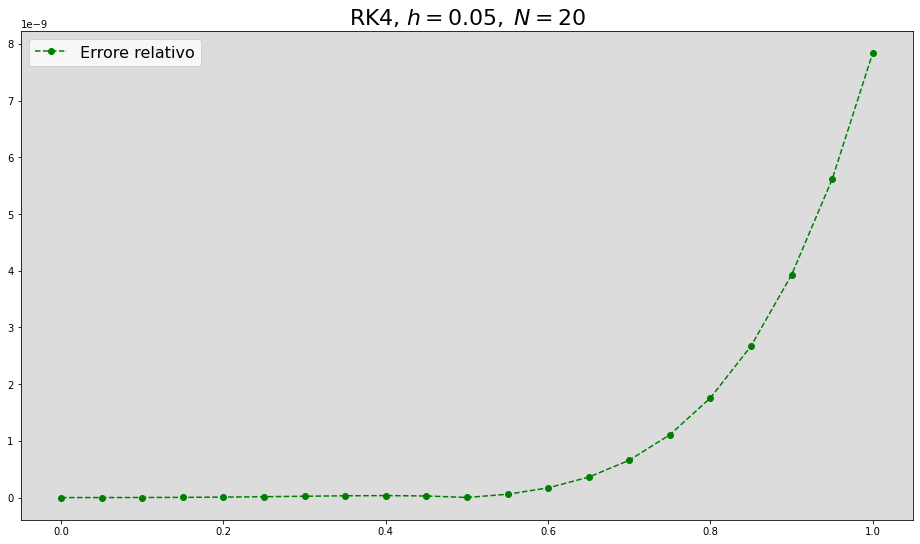

Tempo di esecuzione: t = 0.831387 s
Errore max assoluto: E = 0.0


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
t=time()

x0, x_fin = 0, 1
y0 = 1

c   = y0 * np.exp(x0**2/2)
sol = lambda x: c*np.exp(-x**2/2)
f   = lambda x,y: -x*y


def Runge_Kutta4(h = .05):
    
    global h0, N, X, Y_num, Err, Emax
    h0 = h
    N  = int( round((x_fin - x0)/h, 0))
    
    X      = np.append([x0], np.empty(N))    #array delle x
    Y_num  = np.append([y0], np.empty(N))    #array delle y approssimate
    Err    = np.append([0] , np.empty(N))    #array degli errori assoluti
    
    y_i, Emax = y0, 0                        #Emax è l'errore globale massimo. Si aggiorna di volta in volta.
    for i in range(1, N+1):
        x_i = x0 + (i-1)*h

        k1 = h*f(x_i, y_i)
        k2 = h*f(x_i + h/2, y_i + k1/2)
        k3 = h*f(x_i + h/2, y_i + k2/2)
        k4 = h*f(x_i + h  , y_i + k3)
        
        y_i = y_i + (k1 + 2*k2 + 2*k3 + k4)/6
        e_i = y_i - sol(x_i + h)

        X[i]     = x_i + h
        Y_num[i] = y_i
        Err[i]   = abs(e_i)
        if abs(e_i) > abs(Emax):
            Emax = e_i

Runge_Kutta4()
Y_anal = sol(X)


plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title('RK4, $h = '+str(round(h0,3))+', \; N = '+str(N)+'$', size=22)
plt.plot(X, Y_anal,'o-b', ms=4, label='Sol. analitica')
plt.plot(X, Y_num, 'o-r', ms=4, label='Sol. numerica')
plt.plot([x0],[y0],'^ g', ms=7, label='$(x_0,y_0) = ($' +str(round(x0,3))+ ',' + str(round(y0,3))+')')
plt.legend(fontsize=16)
plt.show()


plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title('RK4, $h = '+str(round(h0,3))+', \; N = '+str(N)+'$', size=22)
plt.plot(X, Err, 'o--g', label='Errore assoluto')
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title('RK4, $h = '+str(round(h0,3))+', \; N = '+str(N)+'$', size=22)
plt.plot(X, Err/Y_anal, 'o--g', label='Errore relativo')
plt.legend(fontsize=16)
plt.show()


del X, Y_anal, Y_num, Err

t=time()-t
print('Tempo di esecuzione: t =',round(t,6),'s')
print('Errore max assoluto: E =', round(Emax,6))

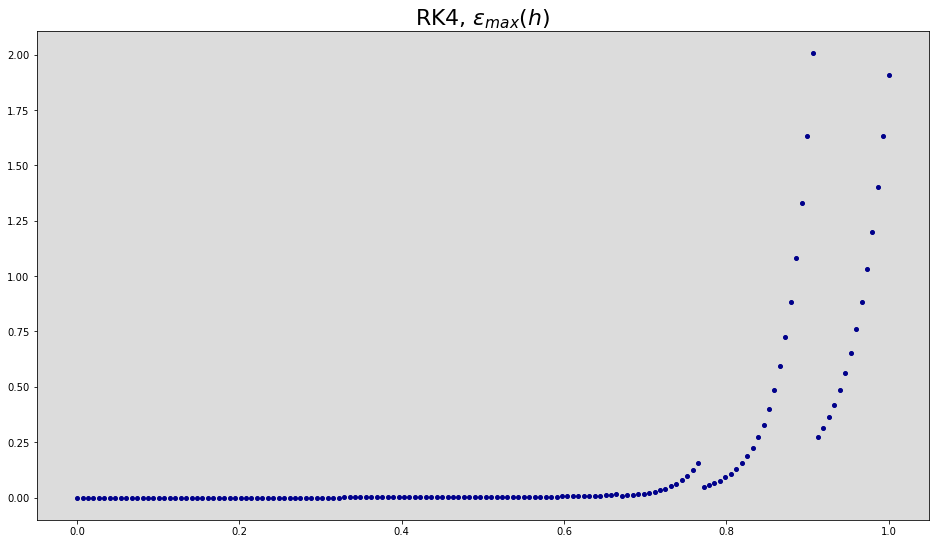

Tempo di esecuzione: t = 0.735 s


In [16]:
#Andamento dell'errore globale al variare di h

t=time()

h1, h2 = 10**(-4), 10**(0)
n_h = 150

h_array = np.linspace(h1, h2, n_h)
Emax_array = np.empty(n_h)

for k in range(n_h):
    Runge_Kutta4( h_array[k] )
    Emax_array[k] = abs(Emax)

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title('RK4, $\epsilon_{max}(h)$', size=22)
plt.plot(h_array, Emax_array, 'o', c='darkblue', ms=4)
plt.show()


del h_array, Emax_array

t=time()-t
print('Tempo di esecuzione: t =',round(t,3),'s')